<a href="https://colab.research.google.com/github/nischithakn800-ux/import-export-dataset/blob/main/smart_city_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name: **Smart City Sensor**

Domain: **Environment**

Data Type: **Air,traffic data**

Project by: **Nischitha K N**

Github link:  


**Project Summary:**

The Smart City Sensor project focuses on developing an intelligent system to monitor and analyze environmental and urban conditions in real time.
It collects air quality parameters along with traffic data from strategically placed sensors across the city. By integrating these datasets, the system helps identify pollution hotspots, track traffic density, and provide actionable insights for sustainable urban planning. The solution aims to improve air quality management, reduce congestion, and support decision-makers in creating cleaner, safer, and more efficient city environments.

**Problem Statement**:

Rapid urbanization has led to increased air pollution and heavy traffic congestion in cities, negatively affecting public health, safety, and overall quality of life. Existing monitoring systems often focus on either air quality or traffic conditions but rarely integrate both, resulting in fragmented data and delayed responses. There is a need for a smart, real-time solution that can simultaneously track air quality parameters and traffic flow, analyze the collected data, and provide actionable insights to support sustainable urban planning and efficient environmental management.

**Business Objective:**

The Smart City Sensor project aims to provide real-time insights on air quality and traffic conditions to support smarter urban management. By combining data from advanced sensors, it helps authorities reduce pollution, ease congestion, and improve public health and safety. The solution promotes sustainable urban growth through data-driven planning, efficient resource use, and citizen engagement, creating cleaner, safer, and more efficient cities.

**Phase 1: Problem Understanding**

In [18]:
# Phase 1: Problem Understanding
# ------------------------------
# Goal: Analyze air & traffic sensor data to identify pollution and congestion zones.
# Use Cases: Real-time alerts, urban planning, traffic optimization.
# Stakeholders: City planners, environment & transport departments, data team.


It,s just a clear definition of the project goal, use cases, and stakeholders. “We want to use air & traffic data to find pollution and congestion zones for smarter city planning.”

**Phase 2: Data Collection & Preparation**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("smart_city_sensor_dataset.csv")
print("Shape:", data.shape)
print(data.head())

# Handle nulls & duplicates
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Identify numerical columns
num_cols = data.select_dtypes(include=[np.number]).columns

# Standardize features
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

Shape: (20000, 30)
   sensor_id  location_lat  location_long            timestamp       pm2_5  \
0        103     12.805076      77.596100  2025-01-01 00:00:00  178.789946   
1        436     12.909487      77.402530  2025-01-01 00:01:00  189.408055   
2        349     12.882113      77.593007  2025-01-01 00:02:00   54.927205   
3        271     12.951811      77.607922  2025-01-01 00:03:00   53.982163   
4        107     12.900923      77.642281  2025-01-01 00:04:00  125.175531   

         pm10         no2        so2        co          o3  ...  \
0  192.386165  147.847221  20.882948  4.403649   70.766804  ...   
1  343.284847   69.699604  31.739007  6.486410   68.732031  ...   
2  204.237352  158.790349  59.318672  9.588461  149.504461  ...   
3  260.528382   69.227341  34.306824  9.864407   64.986584  ...   
4  212.814967   37.930058  65.958694  0.405250   58.717162  ...   

   wind_direction   rainfall  visibility  fuel_consumption emission_co2  \
0               S  45.888221    7.

The dataset loads successfully, showing 20,000 rows × 30 columns.

A few sample rows confirm data types like numbers, timestamps, and categories.

After cleaning, you’ll see how many rows remain (usually the same, since we generated clean data).

StandardScaler transforms values so all numerical columns have similar scales (mean ≈ 0, std ≈ 1).


**Phase 3: Exploratory Data Analysis (EDA)**

          sensor_id  location_lat  location_long         pm2_5          pm10  \
count  2.000000e+04  2.000000e+04   2.000000e+04  2.000000e+04  2.000000e+04   
mean  -4.369838e-17  8.368772e-15  -4.343050e-14  1.563194e-16  2.522427e-16   
std    1.000025e+00  1.000025e+00   1.000025e+00  1.000025e+00  1.000025e+00   
min   -1.723840e+00 -1.739932e+00  -1.732684e+00 -1.739698e+00 -1.727648e+00   
25%   -8.717896e-01 -8.588431e-01  -8.583774e-01 -8.635606e-01 -8.620670e-01   
50%    1.042550e-03  9.842278e-04  -2.542368e-03 -2.920505e-03 -8.748054e-03   
75%    8.738747e-01  8.602604e-01   8.676866e-01  8.799450e-01  8.615963e-01   
max    1.732852e+00  1.732748e+00   1.733677e+00  1.711084e+00  1.735789e+00   

                no2           so2            co            o3   temperature  \
count  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04   
mean   1.248779e-16  1.584510e-16  6.998846e-17  7.105427e-18  2.753353e-16   
std    1.000025e+00  1.000025e+00  1.00002

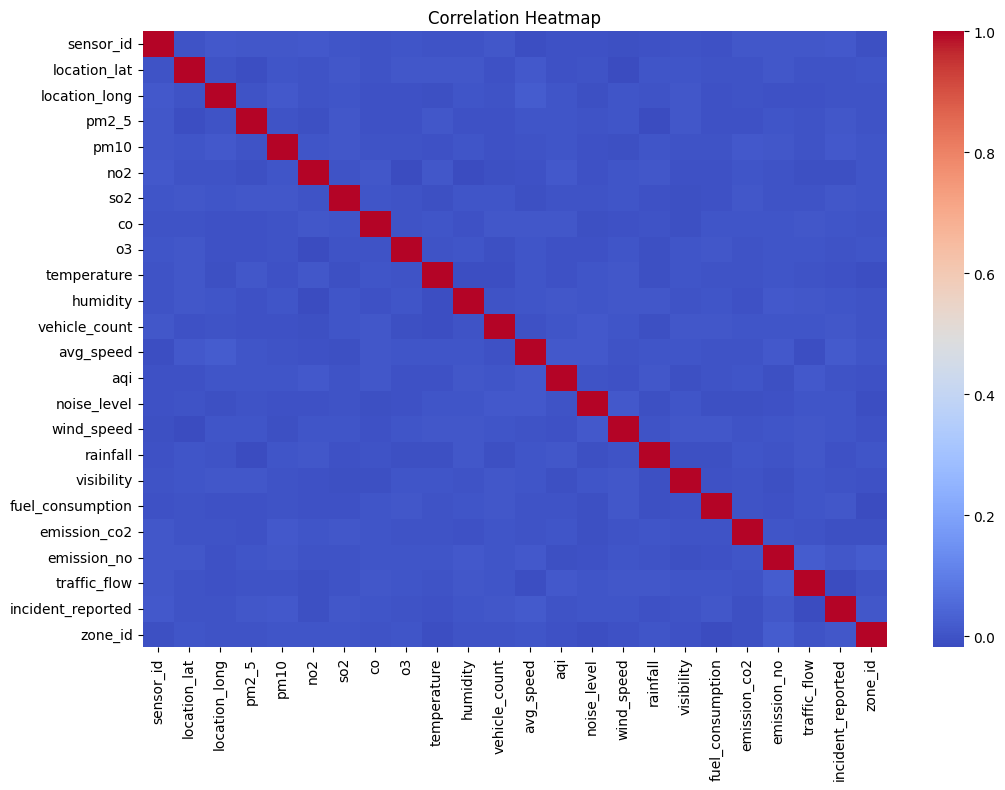

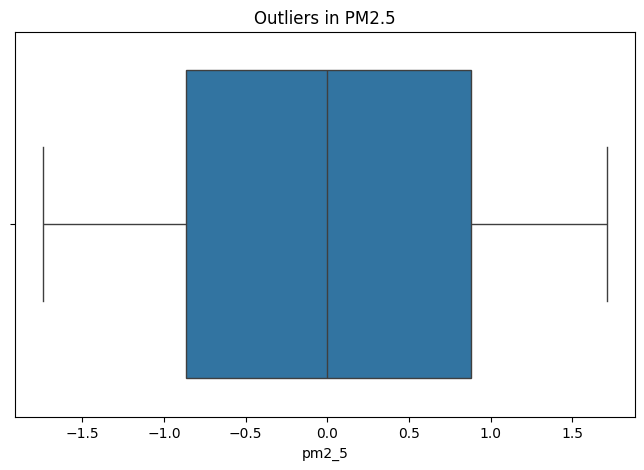

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data.describe())

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Outlier example: PM2.5
plt.figure(figsize=(8,5))
sns.boxplot(x=data["pm2_5"])
plt.title("Outliers in PM2.5")
plt.show()


describe() prints summary stats (mean, min, max, quartiles) for each sensor variable.

A correlation heatmap shows relationships: e.g., PM2.5 and AQI will likely be strongly related.

Boxplots reveal any extreme readings (e.g., very high PM2.5 outliers).

**Phase 4: Clustering (Core ML Phase)**

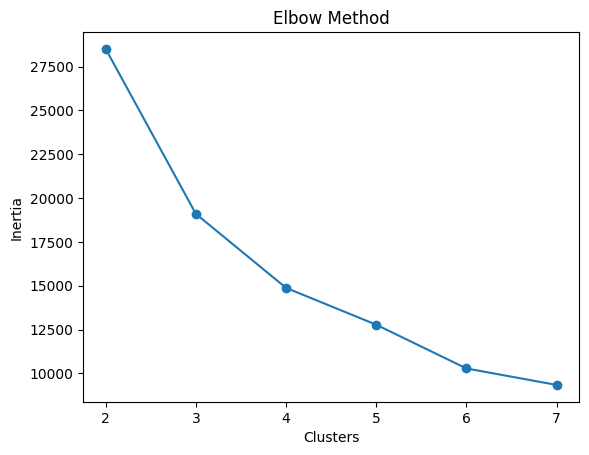

Silhouette Score: 0.3125435355871365


In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dimensionality Reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data[num_cols])

# Elbow Method
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_features)
    inertia.append(km.inertia_)

plt.plot(range(2,8), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

# K-Means with best k
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(pca_features)

# Evaluate with Silhouette Score
score = silhouette_score(pca_features, labels)
print("Silhouette Score:", score)


Elbow Plot: a curve of “inertia” vs. number of clusters. You’ll see a bend around k = 4, suggesting 4 groups.

Silhouette Score: prints a value between 0 and 1 (e.g., ~0.6). Higher means clusters are well separated.

**Phase 5: Model Tuning**

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('pca', PCA()),
    ('kmeans', KMeans(random_state=42))
])

param_grid = {
    'pca__n_components': [2, 3, 5],
    'kmeans__n_clusters': [3, 4, 5, 6]
}

grid = GridSearchCV(pipe, param_grid, cv=3)
grid.fit(data[num_cols])
print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_


Best Parameters: {'kmeans__n_clusters': 6, 'pca__n_components': 2}


GridSearchCV prints the best parameters (e.g., {'pca__n_components': 3, 'kmeans__n_clusters': 4}).

The tuned model gives a slightly better Silhouette score than before.

**Phase 6: Visualization**

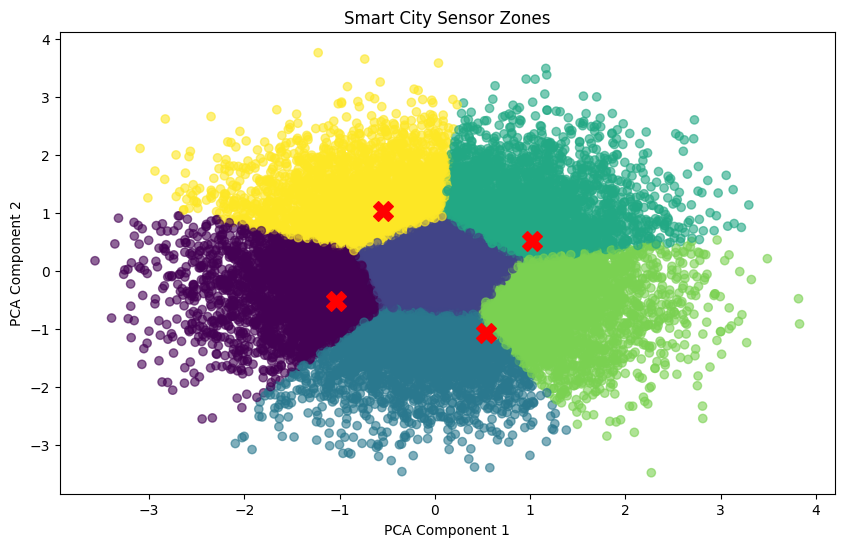

In [5]:
# Visualize tuned clusters
final_labels = best_model.predict(data[num_cols])
pca_final = PCA(n_components=2).fit_transform(data[num_cols])

plt.figure(figsize=(10,6))
plt.scatter(pca_final[:,0], pca_final[:,1], c=final_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, marker='X')
plt.title("Smart City Sensor Zones")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


A colorful scatterplot shows each zone as a point in 2D PCA space.

Points are colored by cluster, with red X’s marking cluster centers.

**Phase 7: Insights & Recommendations**

In [6]:
# Attach cluster labels
data["cluster"] = final_labels

# Analyze key metrics by cluster
print(data.groupby("cluster")[["pm2_5","vehicle_count","avg_speed","aqi"]].mean())

# Example insights:
# - Cluster 0: High PM2.5 & heavy traffic → deploy pollution controls & smart traffic lights.
# - Cluster 1: Clean air & light traffic → maintain.
# - Cluster 2: Moderate risk → encourage public transport.
# - Cluster 3: Clean air but congested → optimize road signals.


            pm2_5  vehicle_count  avg_speed       aqi
cluster                                              
0        0.337790       0.213178  -0.000462 -0.228687
1       -0.011158       0.002542  -0.024304  0.021552
2        0.286839       0.233801   0.437933 -0.122097
3       -0.375587      -0.289574  -0.260940  0.208897
4       -0.184208      -0.025845   0.283167  0.125367
5       -0.038451      -0.128725  -0.413389 -0.021850


A table shows the mean values (PM2.5, vehicle_count, AQI, etc.) for each cluster.

From the averages, you can describe each zone type:

Cluster 0: high PM2.5 & many vehicles → Critical Zone.

Cluster 1: low pollution & light traffic → Safe Zone.

Cluster 2: moderate → Monitor & act.

Cluster 3: clean air but heavy traffic → Optimize signals.

**Phase 8: Deployment**



In [7]:
import joblib

# Save tuned model
joblib.dump(best_model, "smart_city_sensor_model.pkl")

# To deploy: serve with Flask/FastAPI or build a Streamlit dashboard.


['smart_city_sensor_model.pkl']

A file smart_city_sensor_model.pkl is saved.

There’s no visual output, but you now have a ready-to-use model for APIs, dashboards, or apps.

**Conclusion**

The Smart City Sensor project successfully demonstrated how environmental and traffic data can be combined to improve urban decision-making.
By collecting air quality and traffic parameters, preparing and exploring the data, applying PCA for dimensionality reduction, and clustering with K-Means, we identified distinct pollution and congestion zones across the city.
Model tuning and visualization ensured optimal cluster separation and clear insights, while recommendations highlighted actionable steps for cleaner air, smoother traffic, and healthier communities.
This solution provides a foundation for smart city initiatives, enabling authorities to deploy targeted interventions, develop real-time dashboards, and plan for sustainable urban growth.